<a href="https://colab.research.google.com/github/AdityaGoyal1999/StockPredictionML/blob/main/Stock_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import yfinance as yf # gets finance values from yahoo finanace

In [3]:
sp500 = yf.Ticker('^GSPC')
sp500 = sp500.history(period="max")

In [4]:
sp500

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,0.0,0.0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0.0,0.0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,0.0,0.0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
...,...,...,...,...,...,...,...
2023-10-12 00:00:00-04:00,4380.939941,4385.850098,4325.430176,4349.609863,3713140000,0.0,0.0
2023-10-13 00:00:00-04:00,4360.490234,4377.100098,4311.970215,4327.779785,0,0.0,0.0
2023-10-16 00:00:00-04:00,4342.370117,4383.330078,4342.370117,4373.629883,3409960000,0.0,0.0


In [5]:
sp500.index

DatetimeIndex(['1927-12-30 00:00:00-05:00', '1928-01-03 00:00:00-05:00',
               '1928-01-04 00:00:00-05:00', '1928-01-05 00:00:00-05:00',
               '1928-01-06 00:00:00-05:00', '1928-01-09 00:00:00-05:00',
               '1928-01-10 00:00:00-05:00', '1928-01-11 00:00:00-05:00',
               '1928-01-12 00:00:00-05:00', '1928-01-13 00:00:00-05:00',
               ...
               '2023-10-05 00:00:00-04:00', '2023-10-06 00:00:00-04:00',
               '2023-10-09 00:00:00-04:00', '2023-10-10 00:00:00-04:00',
               '2023-10-11 00:00:00-04:00', '2023-10-12 00:00:00-04:00',
               '2023-10-13 00:00:00-04:00', '2023-10-16 00:00:00-04:00',
               '2023-10-17 00:00:00-04:00', '2023-10-18 00:00:00-04:00'],
              dtype='datetime64[ns, America/New_York]', name='Date', length=24065, freq=None)

<Axes: xlabel='Date'>

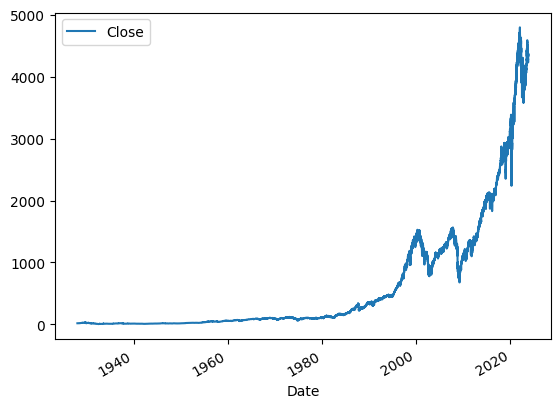

In [6]:
sp500.plot.line(y='Close', use_index=True)

In [7]:
del sp500["Dividends"]
del sp500["Stock Splits"]

In [28]:
# setting up the target for model prediction
# the target will be if the stock will go up or down

sp500["Tomorrow"] = sp500["Close"].shift(-1)

In [33]:
sp500["Target"] = (sp500["Tomorrow"] > sp500["Close"]).astype(int)

In [34]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1999-01-04 00:00:00-05:00,1229.229980,1248.810059,1219.099976,1228.099976,877000000,1244.780029,1
1999-01-05 00:00:00-05:00,1228.099976,1246.109985,1228.099976,1244.780029,775000000,1272.339966,1
1999-01-06 00:00:00-05:00,1244.780029,1272.500000,1244.780029,1272.339966,986900000,1269.729980,0
1999-01-07 00:00:00-05:00,1272.339966,1272.339966,1257.680054,1269.729980,863000000,1275.089966,1
1999-01-08 00:00:00-05:00,1269.729980,1278.239990,1261.819946,1275.089966,937800000,1263.880005,0
...,...,...,...,...,...,...,...
2023-10-12 00:00:00-04:00,4380.939941,4385.850098,4325.430176,4349.609863,3713140000,4327.779785,0
2023-10-13 00:00:00-04:00,4360.490234,4377.100098,4311.970215,4327.779785,0,4373.629883,1
2023-10-16 00:00:00-04:00,4342.370117,4383.330078,4342.370117,4373.629883,3409960000,4373.200195,0


In [35]:
# removing all data that came before 1990

sp500 = sp500.loc["1999-01-01":].copy()

In [36]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, min_samples_split=100, random_state=1)
train = sp500.iloc[:-100]
# why can't we apply cross_validation to time_series
test = sp500.iloc[-100:]

predictors = ["Close", "Volume", "Open", "High", "Low"]
model.fit(train[predictors], train["Target"])

RandomForestClassifier(min_samples_split=100, random_state=1)

In [38]:
from sklearn.metrics import precision_score

# to check how many times our prediction was correct
# i.e. when we said the market would go up, how many times did it acutally go up

preds = model.predict(test[predictors])


In [39]:
import pandas as pd

preds = pd.Series(preds, index=test.index)

In [40]:
precision_score(test["Target"], preds)

0.5211267605633803

Right now, we can see that this model is performing poorly. Clearly, it has high uncertainity.